In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

In [3]:
df_games.head() #visão geral dos dados

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df_games.columns = df_games.columns.str.lower() #substituindo nomes das colunas para minúsculos

In [6]:
#trasformando colunas year_of_release em data, talvez possa ser relevante usar os anos como tipo data para analises futuras
df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format = '%Y')
print(df_games.dtypes)
print()
print(df_games['year_of_release'].head())

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                 object
rating                     object
dtype: object

0   2006-01-01
1   1985-01-01
2   2008-01-01
3   2009-01-01
4   1996-01-01
Name: year_of_release, dtype: datetime64[ns]



Acredito que os valores nulos das colunas 'critic_score', 'user_score' e 'rating', não serão relevantes para essa analise então decidir deixar os valores nulos como estão

In [8]:
#somando todas as sales e criando uma nova coluna com o total
df_games['total_sales'] = df_games[['jp_sales', 'eu_sales', 'na_sales', 'other_sales']].sum(axis=1)
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [9]:
#vericando quantos jogos por ano de lançamento
df_games['year_of_release'].value_counts()

2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2007-01-01    1197
2011-01-01    1136
2006-01-01    1006
2005-01-01     939
2002-01-01     829
2003-01-01     775
2004-01-01     762
2012-01-01     653
2015-01-01     606
2014-01-01     581
2013-01-01     544
2016-01-01     502
2001-01-01     482
1998-01-01     379
2000-01-01     350
1999-01-01     338
1997-01-01     289
1996-01-01     263
1995-01-01     219
1994-01-01     121
1993-01-01      62
1981-01-01      46
1992-01-01      43
1991-01-01      41
1982-01-01      36
1986-01-01      21
1983-01-01      17
1989-01-01      17
1990-01-01      16
1987-01-01      16
1988-01-01      15
1984-01-01      14
1985-01-01      14
1980-01-01       9
Name: year_of_release, dtype: int64

In [10]:
sales_per_platform = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending= False)
#agrupando valores total de vendas por plataformas 
print(sales_per_platform.head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


PLATAFORMAS QUE MAIS VENDEM 

É possível ver que há três plataformas que vendem mais. PS2, X360, PS3, Wii, DS e PS.

In [11]:
sales_year_platform = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum()


In [12]:
top_platforms= sales_per_platform.head(10).index.tolist()
print(top_platforms)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


In [13]:
df_top = df_games[df_games['platform'].isin(top_platforms)]
print(df_top.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12819 entries, 0 to 16713
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             12819 non-null  object        
 1   platform         12819 non-null  object        
 2   year_of_release  12615 non-null  datetime64[ns]
 3   genre            12819 non-null  object        
 4   na_sales         12819 non-null  float64       
 5   eu_sales         12819 non-null  float64       
 6   jp_sales         12819 non-null  float64       
 7   other_sales      12819 non-null  float64       
 8   critic_score     6403 non-null   float64       
 9   user_score       8117 non-null   object        
 10  rating           8063 non-null   object        
 11  total_sales      12819 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 1.3+ MB
None


In [14]:
distribution_by_year = df_top.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
print(distribution_by_year.head(10))

  platform year_of_release  total_sales
0       DS      1985-01-01         0.02
1       DS      2004-01-01        17.27
2       DS      2005-01-01       130.14
3       DS      2006-01-01       119.81
4       DS      2007-01-01       146.94
5       DS      2008-01-01       145.31
6       DS      2009-01-01       119.54
7       DS      2010-01-01        85.02
8       DS      2011-01-01        26.18
9       DS      2012-01-01        11.01


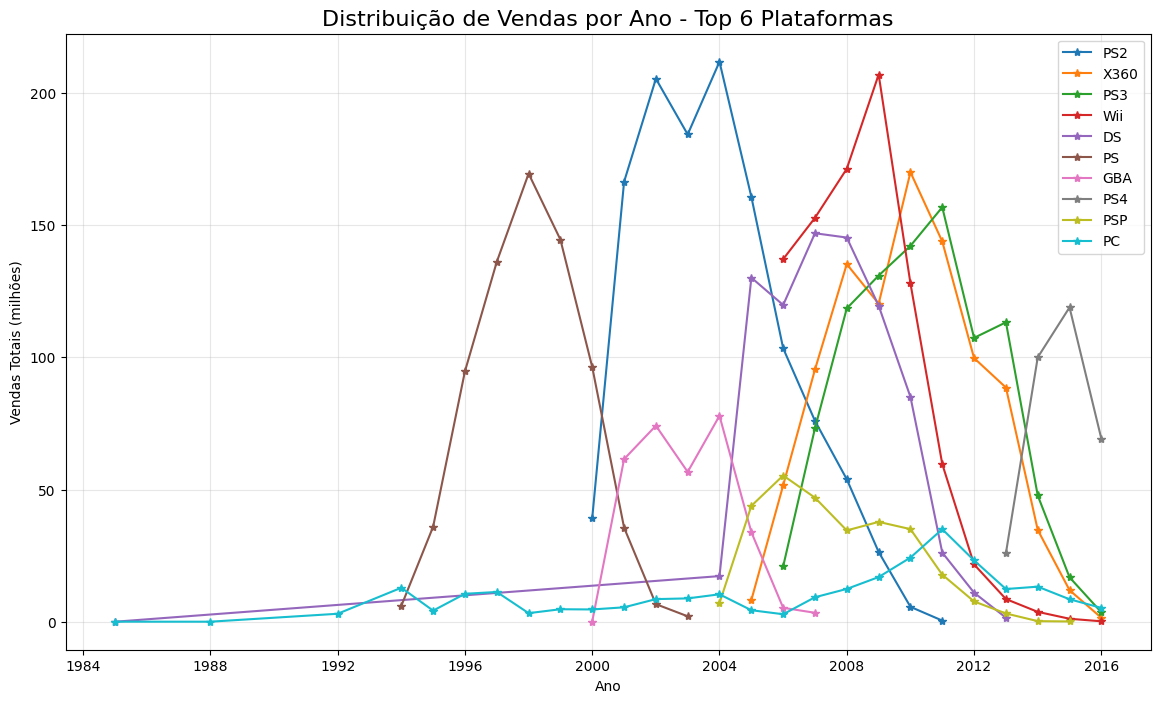

In [15]:
#Gráfico com as vendas das plataformas mais populares
plt.figure(figsize=(14, 8))

for platform in top_platforms:
    platform_data = distribution_by_year[distribution_by_year['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], 
             marker='*', label=platform)

plt.title('Distribuição de Vendas por Ano - Top 6 Plataformas', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (milhões)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
#analisando plataformas que não são populares em 2016

df_games['year'] = df_games['year_of_release'].dt.year

anos_antigos = range(1980, 2010)  # Antes de 2010
anos_recentes = range(2010, 2017)  # 2010 em diante

vendas_antigas = df_games[df_games['year'].isin(anos_antigos)].groupby('platform')['total_sales'].sum()
vendas_recentes = df_games[df_games['year'].isin(anos_recentes)].groupby('platform')['total_sales'].sum()

plataformas_mortas = []
for platform in vendas_antigas.index:
    vendas_antiga = vendas_antigas[platform]
    vendas_recente = vendas_recentes.get(platform, 0)
    
   
    if vendas_antiga > 30 and vendas_recente < 5:
        plataformas_mortas.append({
            'plataforma': platform,
            'vendas_antigas': vendas_antiga,
            'vendas_recentes': vendas_recente
        })

print("Plataformas que 'morreram':")
for p in plataformas_mortas:
    print(f"{p['plataforma']}: {p['vendas_antigas']:.1f}M → {p['vendas_recentes']:.1f}M")


Plataformas que 'morreram':
2600: 86.5M → 0.0M
GB: 254.4M → 0.0M
GBA: 312.9M → 0.0M
GC: 196.7M → 0.0M
GEN: 30.8M → 0.0M
N64: 218.0M → 0.0M
NES: 251.0M → 0.0M
PS: 727.6M → 0.0M
SAT: 33.6M → 0.0M
SNES: 200.0M → 0.0M
XB: 251.6M → 0.0M


In [17]:
#ciclo de vida das plataformas não mais populares
def ciclo_vida_platform (platform_name):
    platform_data = df_games[df_games['platform'] == platform_name]
    vendas_por_ano = platform_data.groupby('year')['total_sales'].sum()
    
    if len(vendas_por_ano) == 0:
        return None

    first_year = vendas_por_ano[vendas_por_ano >1].index.min()
    last_year = vendas_por_ano[vendas_por_ano >1].index.max()
    max_year = vendas_por_ano.idxmax()

    if pd.isna(first_year) or pd.isna(last_year):
        return None

    life_time = last_year - first_year

    
    return{'plataforma': platform_name,
        'primeiro_ano': first_year,
        'ano_pico': max_year,
        'ultimo_ano': last_year,
        'ciclo_vida': life_time,
        'vendas_pico': vendas_por_ano.max(),
           'vendas_totais': vendas_por_ano.sum()
          }

resultado = ciclo_vida_platform('N64')
print(resultado)
resultado = ciclo_vida_platform('GB')
print(resultado)



{'plataforma': 'N64', 'primeiro_ano': 1996.0, 'ano_pico': 1999.0, 'ultimo_ano': 2001.0, 'ciclo_vida': 5.0, 'vendas_pico': 57.86999999999998, 'vendas_totais': 218.01}
{'plataforma': 'GB', 'primeiro_ano': 1988.0, 'ano_pico': 1989.0, 'ultimo_ano': 2001.0, 'ciclo_vida': 13.0, 'vendas_pico': 64.97, 'vendas_totais': 254.43000000000004}


['2600', 'GB', 'GBA', 'GC', 'GEN', 'N64', 'NES', 'PS', 'SAT', 'SNES', 'XB']


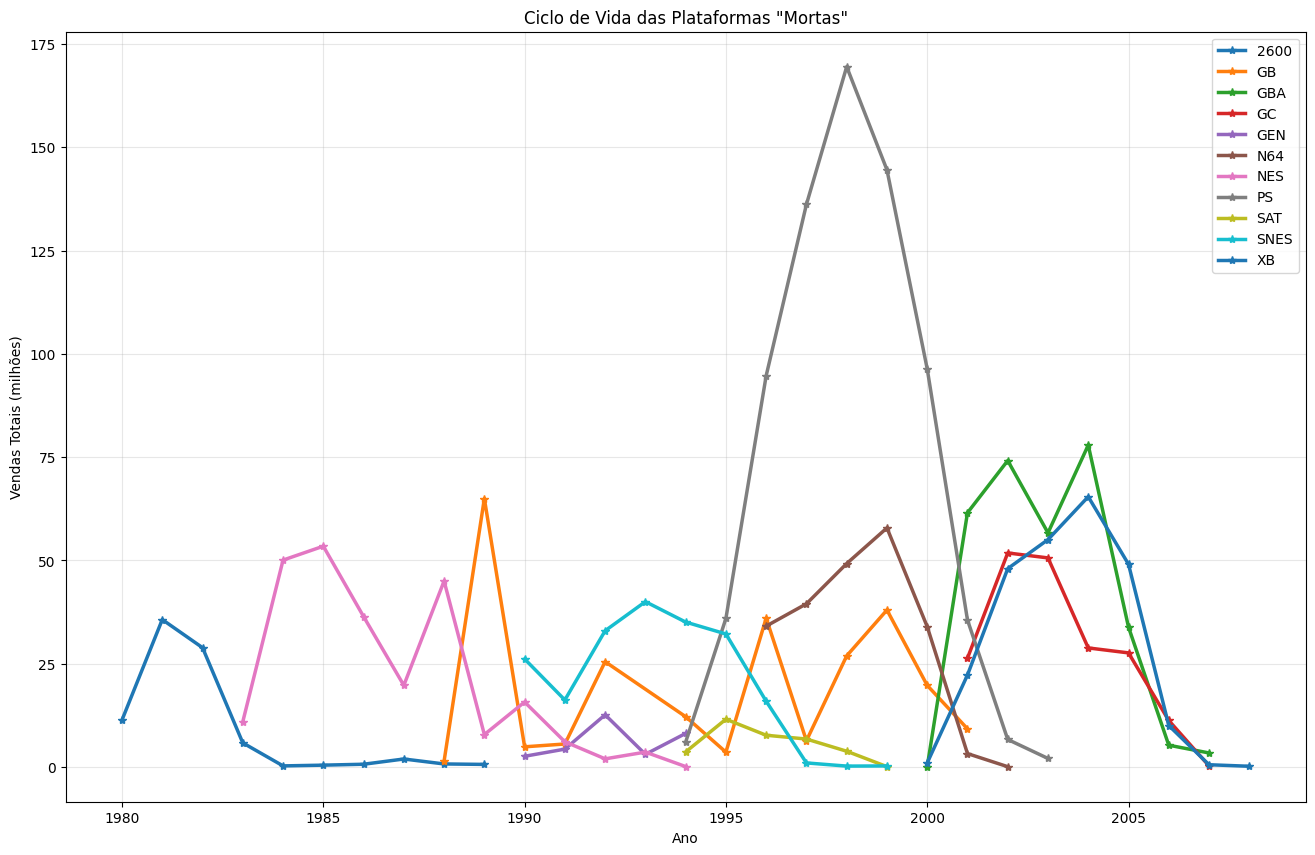

In [18]:
nomes_plataformas_mortas = [p['plataforma'] for p in plataformas_mortas]
print(nomes_plataformas_mortas)


plt.figure(figsize=(16, 10))

for i, platform in enumerate(nomes_plataformas_mortas):
    # Filtrar dados da plataforma
    platform_data = df_games[df_games['platform'] == platform]
    vendas_por_ano = platform_data.groupby('year')['total_sales'].sum()
    
    if len(vendas_por_ano) > 0:
        plt.plot(vendas_por_ano.index, vendas_por_ano.values, 
                marker='*', linewidth=2.5, markersize=6,
                label=platform)

plt.title('Ciclo de Vida das Plataformas "Mortas"')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (milhões)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

ESCOLHA DA DATAS PARA A ANÁLISE

Acredito que analisar as vendas das plataformas de 2012 até 2016 seja a melhor escolha para projetar as vendas de 2017

In [19]:
#filtrando dados de 2012 a 2016

df_recent = df_games[(df_games['year'] >= 2012) & (df_games['year'] <= 2016)]
print(df_recent.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             2886 non-null   object        
 1   platform         2886 non-null   object        
 2   year_of_release  2886 non-null   datetime64[ns]
 3   genre            2886 non-null   object        
 4   na_sales         2886 non-null   float64       
 5   eu_sales         2886 non-null   float64       
 6   jp_sales         2886 non-null   float64       
 7   other_sales      2886 non-null   float64       
 8   critic_score     1312 non-null   float64       
 9   user_score       1663 non-null   object        
 10  rating           1611 non-null   object        
 11  total_sales      2886 non-null   float64       
 12  year             2886 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 315.7+ KB
None


In [20]:
print(df_recent.info(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             2886 non-null   object        
 1   platform         2886 non-null   object        
 2   year_of_release  2886 non-null   datetime64[ns]
 3   genre            2886 non-null   object        
 4   na_sales         2886 non-null   float64       
 5   eu_sales         2886 non-null   float64       
 6   jp_sales         2886 non-null   float64       
 7   other_sales      2886 non-null   float64       
 8   critic_score     1312 non-null   float64       
 9   user_score       1663 non-null   object        
 10  rating           1611 non-null   object        
 11  total_sales      2886 non-null   float64       
 12  year             2886 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 315.7+ KB
None


In [21]:
platforms_recent = df_recent.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
print(platforms_recent.head(10))

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64


In [22]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
 11  total_sales      16715 non-null  float64       
 12  year             16446 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 1.7+ MB


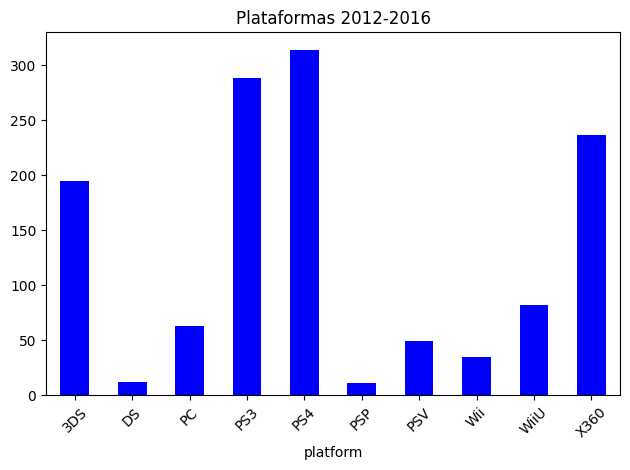

In [23]:
df_recent.groupby('platform')['total_sales'].sum().head(10).plot(kind='bar', color = 'b')
plt.title('Plataformas 2012-2016')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
print('Plataformas top 10 vendas totais (2012 - 2016):')
print(platforms_recent.head(10))

Plataformas top 10 vendas totais (2012 - 2016):
platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64


In [25]:
sales_year = df_recent.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
sales_year

,platform,year_of_release,total_sales
0,3DS,2012-01-01,51.36
1,3DS,2013-01-01,56.57
2,3DS,2014-01-01,43.76
3,3DS,2015-01-01,27.78
4,3DS,2016-01-01,15.14
5,DS,2012-01-01,11.01
6,DS,2013-01-01,1.54
7,PC,2012-01-01,23.22
8,PC,2013-01-01,12.38
9,PC,2014-01-01,13.28


In [26]:
def calcular_tendencia(platform_name):
    dados = sales_year[sales_year['platform'] == platform_name]
    if len(dados) >= 3:  
        vendas = dados['total_sales'].values
        crescimento = (vendas[-1] - vendas[0]) / vendas[0] * 100
        return crescimento
    return None
    

In [27]:
top_platforms = platforms_recent.head(8).index
tendencias = {}
for platform in top_platforms:
    crescimento = calcular_tendencia(platform)
    if crescimento is not None:
        tendencias[platform] = crescimento

for platform, crescimento in sorted(tendencias.items(), key=lambda x: x[1], reverse=True):
    status = "Crescendo" if crescimento > 0 else "Diminuindo"
    print(f"{platform}: {crescimento:+.1f}% {status}")
    

PS4: +166.4% Crescendo
XOne: +37.9% Crescendo
3DS: -70.5% Diminuindo
PSV: -73.7% Diminuindo
WiiU: -73.8% Diminuindo
PC: -77.4% Diminuindo
PS3: -96.6% Diminuindo
X360: -98.5% Diminuindo


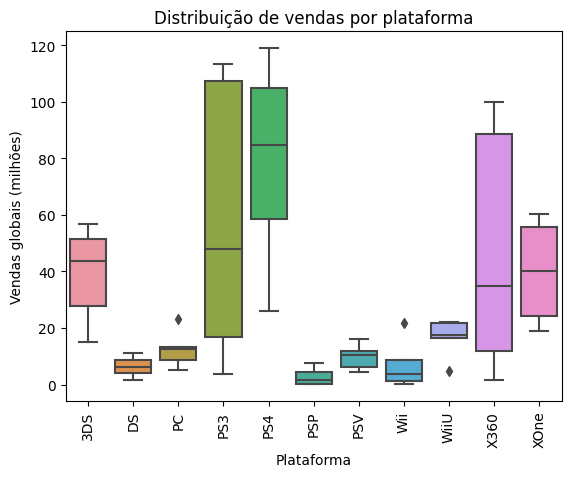

In [28]:
sns.boxplot(data=sales_year, x='platform', y='total_sales')
plt.title('Distribuição de vendas por plataforma')
plt.xlabel('Plataforma')
plt.xticks(rotation= 90)
plt.ylabel('Vendas globais (milhões)')
plt.show()

Decidi usar o Dataframe sales_year para visualizar as vendas globais das plataformas mais com melhores vendas entre os anos de 2012 a 2016. É possível observar que as plataformas com mais vendas e médias superior as outras são PS3  e PS4. X360 tem boas vendas mas uma média baixa em compração as duas médias maid altas. O XOne e 3DS tem médias globais parecidas. 


Irei usar o PS4 para analisar as avaliações e vendas pois é a plataforma mais lucrativa

In [29]:
#fazdendo um dataframe apenas com informações da plataforma PS4
ps4_score = df_recent[df_recent['platform'] == 'PS4'].copy()
ps4_score = ps4_score[ps4_score['user_score'] != 'tbd']
ps4_score['user_score'] = pd.to_numeric(ps4_score['user_score'], errors='coerce')

In [30]:
#limpando dados para uma melhor visualização
ps4_clean = ps4_score.dropna(subset=['critic_score', 'user_score'])
print(len(ps4_clean))

249


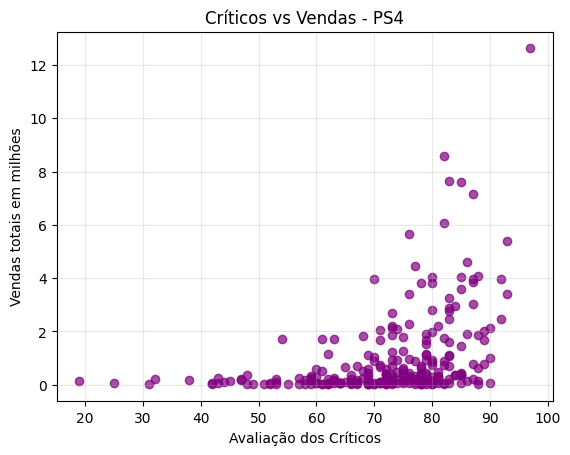

In [31]:
#construindo um gráfico de critic score vs vendas
plt.scatter(ps4_clean['critic_score'], ps4_clean['total_sales'], alpha=0.7, color='purple')
plt.xlabel('Avaliação dos Críticos')
plt.ylabel('Vendas totais em milhões')
plt.title('Críticos vs Vendas - PS4')
plt.grid(True, alpha=0.3)
plt.show()

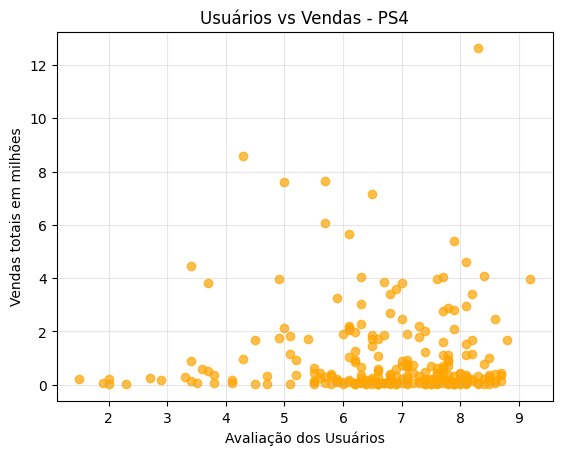

In [32]:
#gráfico de user score vs vendas
plt.scatter(ps4_clean['user_score'], ps4_clean['total_sales'], alpha=0.7, color='orange')
plt.xlabel('Avaliação dos Usuários')
plt.ylabel('Vendas totais em milhões')
plt.title('Usuários vs Vendas - PS4')
plt.grid(True, alpha=0.3)
plt.show()

In [33]:
#Calculando a correlação

corr_critic = ps4_clean['critic_score'].corr(ps4_clean['total_sales'])
corr_user = ps4_clean['user_score'].corr(ps4_clean['total_sales'])

print(f'Correlação Críticos vs Vendas: {corr_critic}')
print(f'Correlação Usuários vs Vendas: {corr_user}')

Correlação Críticos vs Vendas: 0.40589480145836687
Correlação Usuários vs Vendas: -0.03362497596528878


Há uma correlação positiva entre as avalições dos criticos e as vendas, é certo dizer que os jogos com uma avaliação positiva dos criticos tendem a influenciar positivamente as vendas dos jogos. 
Já as avaliações dos usuários não influenciam nas vendas dos jogos de PS4.

In [34]:
#analisando vendas e gêneros

genre_game = df_games['genre'].value_counts()
print('Gêneros mais vendidos: ', genre_game)


Gêneros mais vendidos:  Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


In [35]:
genre_sales = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending= False)
print('Vendas por gênero:', genre_sales)

Vendas por gênero: genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


Ao que parece os gêneros mais lucrativos são Action, Sports e Shooter, acredito por serem tipos de jogos com bastante variedade de jogos no mercado.
Já os generos menos lucrativos são mais nichados, com um mercado menor de consumidores.

In [36]:
#Analisando vendas por regiões


na_platforms = df_recent.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

eu_platforms = df_recent.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

jp_platforms = df_recent.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

print('North America top sales: ', na_platforms.head(5))
print('Europe top sales: ', eu_platforms.head(5))
print('Japan top sales: ', jp_platforms.head(5))

North America top sales:  platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64
Europe top sales:  platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64
Japan top sales:  platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


In [37]:
#quotas em percentual das 5 mais populares 

top_na = na_platforms.head(5)
top_eu = eu_platforms.head(5)
top_jp = jp_platforms.head(5)

quota_na = (top_na / na_platforms.sum()) *100
quota_eu = (top_eu / eu_platforms.sum()) *100
quota_jp = (top_jp / jp_platforms.sum()) *100

print('Percentual de vendas North America: ', quota_na)
print('Percentual de vendas Europe: ', quota_eu)
print('Percentual de vendas Japan: ', quota_jp)

Percentual de vendas North America:  platform
X360    23.698326
PS4     18.400257
PS3     17.493274
XOne    15.757145
3DS      9.359189
Name: na_sales, dtype: float64
Percentual de vendas Europe:  platform
PS4     27.838286
PS3     21.084409
X360    14.703445
XOne    10.179156
3DS      8.413243
Name: eu_sales, dtype: float64
Percentual de vendas Japan:  platform
3DS     45.586250
PS3     18.324852
PSV     10.925330
PS4      8.287465
WiiU     6.755634
Name: jp_sales, dtype: float64


Todas as regiões tem plataformas em comum, que são PS3, PS4 e 3DS. é possível analisar que na America do Norte e Europa os consoles são os que lideram as vendas, no entando, no Japão consoles portáteis são os mais vendidos e é a única região em que há dois consoles da nintendo no top 5 e nenhum console XBOX. As distribuições das quotas da Norte do America e Europa são mais distribuídas entre as top 3 plataformas enquanto no Japão o 3DS lidera com quase 50% das vendas, mostrando a força que a Nintendo tem no país. 

In [38]:
#generos populares em cada região

na_genre = df_recent.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_genre = df_recent.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_genre = df_recent.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

print('Top gêneros North America: ', na_genre.head(5))
print('Top gêneros Europe: ', eu_genre.head(5))
print('Top gêneros Japan: ', jp_genre.head(5))

Top gêneros North America:  genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64
Top gêneros Europe:  genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64
Top gêneros Japan:  genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


In [39]:
#genres quota

quota_na_genre = (na_genre.head(5)/na_genre.sum()) *100
quota_eu_genre = (eu_genre.head(5)/eu_genre.sum()) *100
quota_jp_genre = (jp_genre.head(5)/jp_genre.sum()) *100

print('Top gêneros North America: ', quota_na_genre.head(5)) 
print('Top gêneros Europe: ', quota_eu_genre.head(5)) 
print('Top gêneros Japan: ', quota_jp_genre.head(5)) 

Top gêneros North America:  genre
Action          30.092898
Shooter         24.497013
Sports          13.795963
Role-Playing    10.829653
Misc             6.462257
Name: na_sales, dtype: float64
Top gêneros Europe:  genre
Action          31.439170
Shooter         22.388619
Sports          13.632059
Role-Playing     9.575392
Racing           5.384555
Name: eu_sales, dtype: float64
Top gêneros Japan:  genre
Role-Playing    33.980683
Action          27.417177
Misc             6.677744
Simulation       5.405546
Fighting         4.901859
Name: jp_sales, dtype: float64


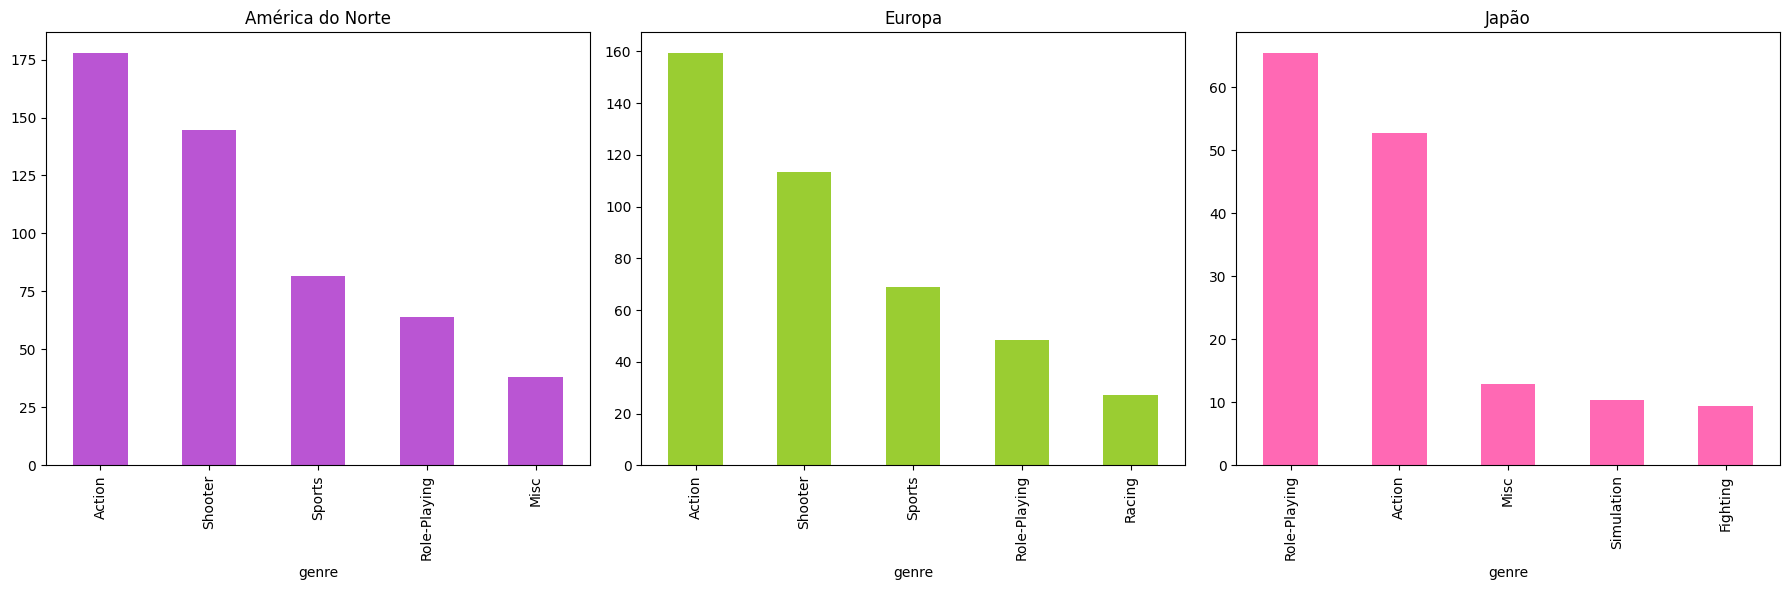

In [40]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

na_genre.head(5).plot(kind='bar', ax=axes[0], title='América do Norte', color='#BA55D3')
eu_genre.head(5).plot(kind='bar', ax=axes[1], title='Europa', color='#9ACD32')
jp_genre.head(5).plot(kind='bar', ax=axes[2], title='Japão', color='#FF69B4')

plt.tight_layout()
plt.show()


Os gêneros na América do Norte e Europa têm comportamentos parecidos, sendo os top 3 gêneros Action, Shooter e Sports, nas mesmas posições e porcentagens parecidas. Mostrando que o Ocidente tem uma tendência maior a consumir esses gêneros de jogos. 
Já o Japão mostra uma predominância dos gêneros RPG e Action, por volta de 60% dos jogos consumidos no Japão foram desses dois gêneros, mostrando assim que no Oriente é mais vantajoso investir nesses dois gêneros. 




In [41]:
#verificando classificações disponíveis

print(df_recent['rating'].value_counts())

M       498
T       412
E       395
E10+    306
Name: rating, dtype: int64


In [42]:
#vendas e classificação por cada região

na_rating = df_recent.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_rating = df_recent.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_rating = df_recent.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

#percentual de vendas por classificação

quota_na_rating = (na_rating/na_rating.sum()) *100
quota_eu_rating = (eu_rating/eu_rating.sum()) *100
quota_jp_rating = (jp_rating/jp_rating.sum()) *100

In [43]:
print('Percentual por classificação America do Norte: ', quota_na_rating)
print('Percentual por classificação Europa: ', quota_eu_rating)
print('Percentual por classificação Japão: ', quota_jp_rating)

Percentual por classificação America do Norte:  rating
M       47.485953
E       23.452815
E10+    15.523110
T       13.538121
Name: na_sales, dtype: float64
Percentual por classificação Europa:  rating
M       46.701339
E       27.215159
E10+    13.331889
T       12.751613
Name: eu_sales, dtype: float64
Percentual por classificação Japão:  rating
E       33.830905
T       31.072367
M       25.316456
E10+     9.780272
Name: jp_sales, dtype: float64


A America do Norte e Europa mostram-se mais receptivas a classsificação Mature, são mais receptivos a conteúdo adulto tendo quase 50% das suas vendas consentradas nessa classificação. Já no Japão se mostra mais receptivo a classificações como Everyone e Teens, deixando Mature em 3 lugar nos mais vendidos. 

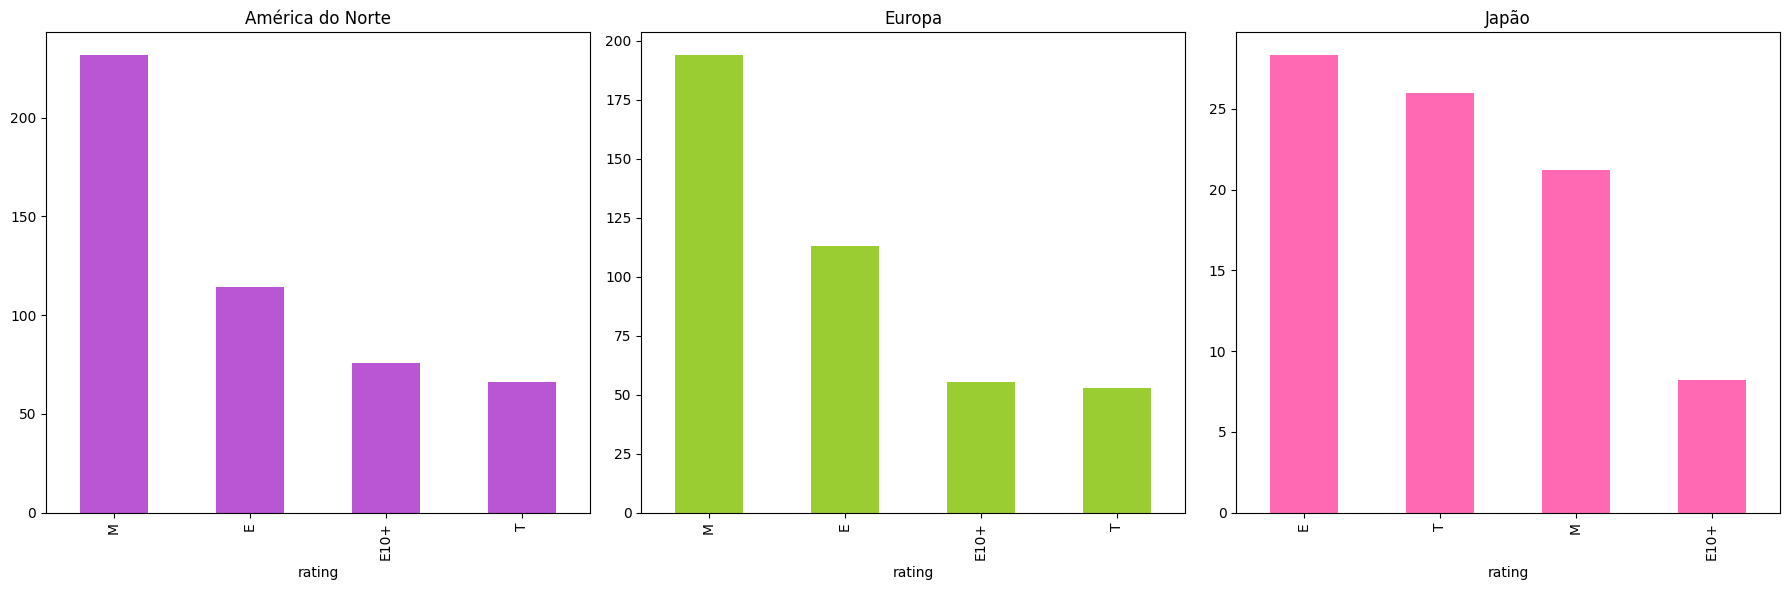

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

na_rating.plot(kind='bar', ax=axes[0], title='América do Norte', color='#BA55D3')
eu_rating.plot(kind='bar', ax=axes[1], title='Europa', color='#9ACD32')
jp_rating.plot(kind='bar', ax=axes[2], title='Japão', color='#FF69B4')

plt.tight_layout()
plt.show()

Analise de Hipoteses
teste de hipótese classificação médias Xbox One vs PC

Hipótese nula: as classificações médias dos usuários das plataformas Xbox One e PC são iguais = H0

Hipótese alternativa: as aclissificações médias dos usuários das plataformas Xbox One e PC são diferentes = H1


In [45]:
xbox_data = df_recent[df_recent['platform']== 'XOne'].copy()
pc_data = df_recent[df_recent['platform']== 'PC'].copy()

xbox_data = xbox_data[xbox_data['user_score'] != 'tbd']
pc_data = pc_data[pc_data['user_score'] != 'tbd']

xbox_data['user_score'] = pd.to_numeric(xbox_data['user_score'], errors= 'coerce')
pc_data['user_score'] = pd.to_numeric(pc_data['user_score'], errors= 'coerce')

xbox_score = xbox_data['user_score'].dropna()
pc_score = pc_data['user_score'].dropna()

In [46]:
print('Xbox One info: ', xbox_score.describe())

print('PC info: ', pc_score.describe())

Xbox One info:  count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
PC info:  count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64


In [47]:
#levene test

levene_stat, levene_p = stats.levene(xbox_score, pc_score)
print(f'Teste de levene: ') 
print(f'Estatística: {levene_stat:.4f}')
print(f'P-value: {levene_p:.4f}')

if levene_p > 0.05:
    print('Variâncias são iguais')
    equal_var = True
else:
    print('Variâncias são diferentes')
    equal_var = False

Teste de levene: 
Estatística: 6.2953
P-value: 0.0125
Variâncias são diferentes


In [48]:
t_stat, t_p = stats.ttest_ind(xbox_score, pc_score, equal_var = equal_var)

print(f'Teste t: ')
print(f'Estatística t: {t_stat: .4f}')
print(f'P-value: {t_p: .4f}')

alpha= 0.05
if t_p < alpha:
    print('Rejeitamos a hipótese nula, as médias são diferentes.')
else:
    print('Não rejeitamos a hipótese nula, as médias são iguais')

Teste t: 
Estatística t:  0.5999
P-value:  0.5490
Não rejeitamos a hipótese nula, as médias são iguais


Teste de hipóteses action vs sports

Hipótese nula : as classificações médias dos usuários para os genêros Action e Sports são iguais.

Hipótese Alternativa : as classificações médias dos usuários para os gêneros Action e Sports são diferentes

In [50]:
#preparando dados para o teste

action_data = df_recent[df_recent['genre'] == 'Action'].copy()
sports_data = df_recent[df_recent['genre'] == 'Sports'].copy()

action_data = action_data[action_data['user_score'] != 'tbd']
sports_data = sports_data[sports_data['user_score'] != 'tbd']

action_data['user_score'] = pd.to_numeric(action_data['user_score'], errors='coerce')
sports_data['user_score'] = pd.to_numeric(sports_data['user_score'], errors='coerce')

action_scores = action_data['user_score'].dropna()
sports_scores = sports_data['user_score'].dropna()

In [51]:
print('Action info: ', action_scores.describe())

print('Sports info: ', sports_scores.describe())

Action info:  count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Sports info:  count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64


In [52]:
#teste de Levene

levene_stat, levene_p = stats.levene(action_scores, sports_scores)

print(f'Teste Levene: ')
print(f'Estatística: {levene_stat: .4f}')
print(f'P-value: {levene_p: .4f}')

if levene_p > 0.05:
    print('Variâncias são iguais')
    equal_var = True
else:
    print('Variâncias são diferentes')
    equal_var = False

Teste Levene: 
Estatística:  19.2599
P-value:  0.0000
Variâncias são diferentes


In [54]:
#teste t para a igualdade das médias
t_stat, t_p = stats.ttest_ind(action_scores, sports_scores, equal_var = equal_var)

print(f'Teste t: ')
print(f'Estatística t: {t_stat: .4f}')
print(f'P-value: {t_p: .4f}')

alpha = 0.05
if t_p < alpha:
    print('Rejeitamos a hipótese nula, as médias são diferentes.')
else:
    print('Não rejeitamos a hipótese nula, as médias são iguais')

Teste t: 
Estatística t:  9.9032
P-value:  0.0000
Rejeitamos a hipótese nula, as médias são diferentes.


Utilizei o alpha padrão para os dois casos, acredito que esse alpha atende os dois casos. 
O nulo foi baseado nas perguntas feitas, respondendo com o teste as hipóteses apresentadas. 